Name: Ashish Kumar Sant

Roll No: 102317018

Subgroup: 3Q11


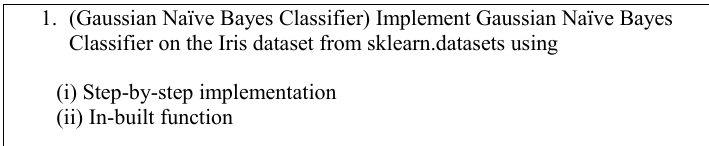

In [4]:
import numpy as np
from sklearn.datasets import load_iris
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.naive_bayes import GaussianNB
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score, classification_report


X, y = load_iris(return_X_y=True)

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

print(f"X_train shape: {X_train.shape}")
print(f"X_test shape: {X_test.shape}")


X_train shape: (105, 4)
X_test shape: (45, 4)


In [5]:
class CustomGaussianNB:

    def fit(self, X, y):
        n_samples, n_features = X.shape
        self.classes = np.unique(y)
        n_classes = len(self.classes)


        self.mean = np.zeros((n_classes, n_features), dtype=np.float64)
        self.var = np.zeros((n_classes, n_features), dtype=np.float64)
        self.priors = np.zeros(n_classes, dtype=np.float64)

        self.epsilon = 1e-9

        for idx, c in enumerate(self.classes):
            X_c = X[y == c]

            self.mean[idx, :] = X_c.mean(axis=0)
            self.var[idx, :] = X_c.var(axis=0) + self.epsilon

            self.priors[idx] = X_c.shape[0] / float(n_samples)

    def predict(self, X):
        y_pred = [self._predict_sample(x) for x in X]
        return np.array(y_pred)

    def _predict_sample(self, x):
        posteriors = []

        for idx, c in enumerate(self.classes):
            log_prior = np.log(self.priors[idx])

            log_likelihood_features = -0.5 * np.log(2 * np.pi * self.var[idx, :]) - \
                                      0.5 * ((x - self.mean[idx, :])**2 / self.var[idx, :])

            total_log_likelihood = np.sum(log_likelihood_features)

            posterior = log_prior + total_log_likelihood
            posteriors.append(posterior)

        return self.classes[np.argmax(posteriors)]

custom_gnb = CustomGaussianNB()
custom_gnb.fit(X_train, y_train)
y_pred_custom = custom_gnb.predict(X_test)
custom_accuracy = accuracy_score(y_test, y_pred_custom)

print(f"GNB Accuracy: {custom_accuracy:.4f}")
print(classification_report(y_test, y_pred_custom))



sklearn_gnb = GaussianNB()
sklearn_gnb.fit(X_train, y_train)
y_pred_sklearn = sklearn_gnb.predict(X_test)
sklearn_accuracy = accuracy_score(y_test, y_pred_sklearn)

print(f"scikit-learn GNB Accuracy: {sklearn_accuracy:.4f}")
print("Classification Report (scikit-learn GNB):")
print(classification_report(y_test, y_pred_sklearn))


GNB Accuracy: 0.9778
              precision    recall  f1-score   support

           0       1.00      1.00      1.00        19
           1       1.00      0.92      0.96        13
           2       0.93      1.00      0.96        13

    accuracy                           0.98        45
   macro avg       0.98      0.97      0.97        45
weighted avg       0.98      0.98      0.98        45

scikit-learn GNB Accuracy: 0.9778
Classification Report (scikit-learn GNB):
              precision    recall  f1-score   support

           0       1.00      1.00      1.00        19
           1       1.00      0.92      0.96        13
           2       0.93      1.00      0.96        13

    accuracy                           0.98        45
   macro avg       0.98      0.97      0.97        45
weighted avg       0.98      0.98      0.98        45



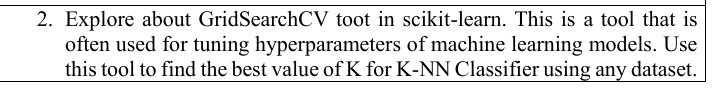

In [6]:
knn = KNeighborsClassifier()


param_grid = {
    'n_neighbors': list(range(1, 31))
}


grid_search = GridSearchCV(
    estimator=knn,
    param_grid=param_grid,
    cv=5,
    scoring='accuracy',
    verbose=1,
    n_jobs=-1
)

grid_search.fit(X_train, y_train)

print(f"Best K value (n_neighbors): {grid_search.best_params_['n_neighbors']}")
print(f"Best cross-validation accuracy: {grid_search.best_score_:.4f}")

best_knn_model = grid_search.best_estimator_
y_pred_knn = best_knn_model.predict(X_test)
knn_test_accuracy = accuracy_score(y_test, y_pred_knn)

print(f"Accuracy of the best K-NN model on the test set: {knn_test_accuracy:.4f}")
print("Classification Report (Best K-NN):")
print(classification_report(y_test, y_pred_knn))


Fitting 5 folds for each of 30 candidates, totalling 150 fits
Best K value (n_neighbors): 1
Best cross-validation accuracy: 0.9524
Accuracy of the best K-NN model on the TEST set: 1.0000
Classification Report (Best K-NN):
              precision    recall  f1-score   support

           0       1.00      1.00      1.00        19
           1       1.00      1.00      1.00        13
           2       1.00      1.00      1.00        13

    accuracy                           1.00        45
   macro avg       1.00      1.00      1.00        45
weighted avg       1.00      1.00      1.00        45

